In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('/Users/wastechs/Documents/git-repos/energy-efficiency')
from lib.util.helper import query_table
import seaborn as sns
import plotly.express as px

In [2]:
df_1T = query_table(table='r707lv_trockner_1T')

In [4]:
px.line(
    x=df_1T.index, y=df_1T.kw, 
    title='Trockner R707LV',
    labels={
        'x': 'Time',
        'y': 'kW'
    })

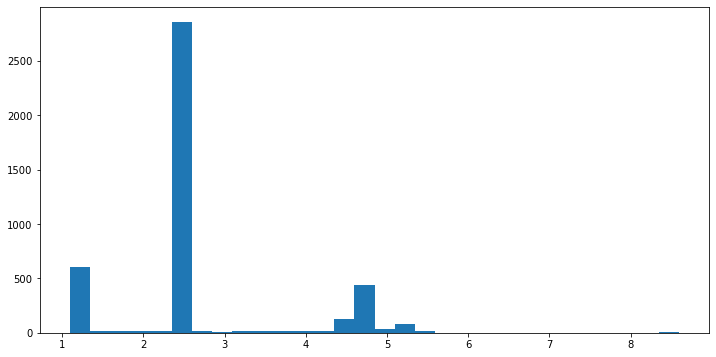

In [5]:
plt.figure(figsize=(12, 6))
plt.hist(x=df_1T.kw, bins=30)
plt.show()